<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/Class_16_20220419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [71]:
train_input.shape
train_target.shape
print(train_input.shape)
print(train_target.shape)

(60000, 28, 28)
(48000,)


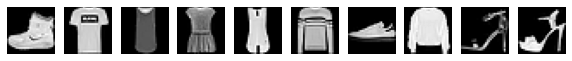

In [5]:
fig, axes = plt.subplots(1, 10, figsize = (10,10))

for i in range(10):
  axes[i].imshow(train_input[i], cmap = 'gray')
  axes[i].axis('off')
plt.show()

In [6]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
np.unique(train_target, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [8]:
train_scaled = (train_input/255.0).reshape(-1, 28*28)
test_scaled = (test_input/255.0).reshape(-1,28*28)

train_scaled.shape

(60000, 784)

In [9]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

In [10]:
print(train_scaled.shape)

(48000, 784)


In [20]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_shape = (784,), activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                23550     
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy',
              optimizer = 'adam') #sparse -> one hot encoding


In [22]:
history = model.fit(train_scaled, train_target, epochs = 100, batch_size = 200, 
          validation_data = (val_scaled, val_target)) # 5 > 20 >100 /

Epoch 1/100
240/240 [==============================] - 2s 5ms/step - loss: 0.7810 - accuracy: 0.7406 - val_loss: 0.5444 - val_accuracy: 0.8150
Epoch 2/100
240/240 [==============================] - 1s 4ms/step - loss: 0.4933 - accuracy: 0.8322 - val_loss: 0.4752 - val_accuracy: 0.8392
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 0.4474 - accuracy: 0.8442 - val_loss: 0.4465 - val_accuracy: 0.8484
Epoch 4/100
240/240 [==============================] - 1s 6ms/step - loss: 0.4211 - accuracy: 0.8532 - val_loss: 0.4250 - val_accuracy: 0.8547
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3992 - accuracy: 0.8606 - val_loss: 0.4169 - val_accuracy: 0.8560
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3850 - accuracy: 0.8650 - val_loss: 0.4038 - val_accuracy: 0.8613
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 0.3712 - accuracy: 0.8698 - val_loss: 0.3948 - val_accuracy: 0.8635

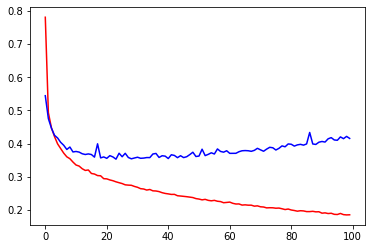

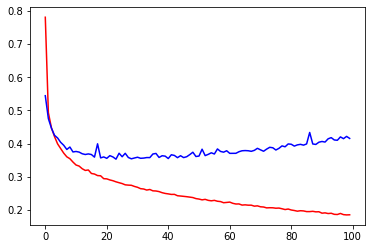

In [23]:
plt.plot(history.history['loss'], c = 'red')
plt.plot(history.history['val_loss'], c= 'blue')
plt.show(0)

In [24]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (784,), name = 'hidden1'))
model.add(keras.layers.Dense(30, activation = 'relu', name = 'hidden2'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 30)                3030      
                                                                 
 output (Dense)              (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy',
              optimizer = 'adam') #sparse -> one hot encoding


In [26]:
history = model.fit(train_scaled, train_target, epochs = 30, batch_size = 200, 
          validation_data = (val_scaled, val_target))

Epoch 1/30
240/240 [==============================] - 2s 8ms/step - loss: 0.7103 - accuracy: 0.7607 - val_loss: 0.4753 - val_accuracy: 0.8409
Epoch 2/30
240/240 [==============================] - 2s 7ms/step - loss: 0.4315 - accuracy: 0.8491 - val_loss: 0.4353 - val_accuracy: 0.8453
Epoch 3/30
240/240 [==============================] - 2s 7ms/step - loss: 0.3918 - accuracy: 0.8616 - val_loss: 0.4076 - val_accuracy: 0.8568
Epoch 4/30
240/240 [==============================] - 2s 7ms/step - loss: 0.3603 - accuracy: 0.8713 - val_loss: 0.3733 - val_accuracy: 0.8701
Epoch 5/30
240/240 [==============================] - 1s 6ms/step - loss: 0.3399 - accuracy: 0.8767 - val_loss: 0.3865 - val_accuracy: 0.8677
Epoch 6/30
240/240 [==============================] - 1s 6ms/step - loss: 0.3257 - accuracy: 0.8821 - val_loss: 0.3713 - val_accuracy: 0.8649
Epoch 7/30
240/240 [==============================] - 1s 6ms/step - loss: 0.3118 - accuracy: 0.8864 - val_loss: 0.3423 - val_accuracy: 0.8786
Epoch 

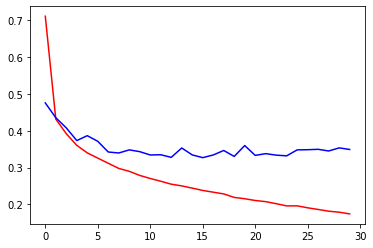

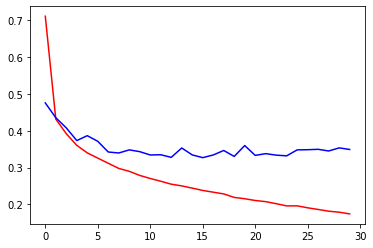

In [27]:
plt.plot(history.history['loss'], c = 'red')
plt.plot(history.history['val_loss'], c= 'blue')
plt.show(0)

In [28]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3669 - accuracy: 0.8783


[0.3669377565383911, 0.8783000111579895]

In [54]:
## model 함수 정의
def model_fn(a_layer = None, name = None):
  model = keras.Sequential(name = name)
  model.add(keras.layers.Flatten(input_shape = (784,))) #input_shape = (784,)/input_shape = (-1,28,28),))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  
  return model

In [58]:
model = model_fn()

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop', #'adam'
              metrics = 'accuracy')

#history = model.fit(train_scaled.reshape(-1,28,28), train_target, epochs = 40) # train_scaled
history = model.fit(train_scaled, train_target, epochs = 40,
                    validation_data = (val_scaled, val_target))

Epoch 1/40
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5318 - accuracy: 0.8112 - val_loss: 0.4517 - val_accuracy: 0.8429
Epoch 2/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3925 - accuracy: 0.8602 - val_loss: 0.4529 - val_accuracy: 0.8438
Epoch 3/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3549 - accuracy: 0.8729 - val_loss: 0.3912 - val_accuracy: 0.8648
Epoch 4/40
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3339 - accuracy: 0.8813 - val_loss: 0.3614 - val_accuracy: 0.8747
Epoch 5/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3205 - accuracy: 0.8857 - val_loss: 0.3980 - val_accuracy: 0.8707
Epoch 6/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3116 - accuracy: 0.8896 - val_loss: 0.3829 - val_accuracy: 0.8761
Epoch 7/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3009 - accuracy: 0.8941 - val_loss: 0.3984 - val_accuracy:

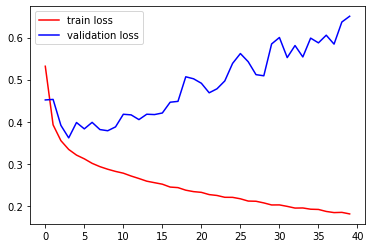

In [57]:
plt.plot(history.history['loss'], c = 'red', label = 'train loss')
plt.plot(history.history['val_loss'], c= 'blue', label = 'validation loss')
plt.legend()
plt.show() #optimizer rmsprop -> 과대접합심함

In [59]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam', #'adam'
              metrics = 'accuracy')

#history = model.fit(train_scaled.reshape(-1,28,28), train_target, epochs = 40) # train_scaled
history = model.fit(train_scaled, train_target, epochs = 40,
                    validation_data = (val_scaled, val_target))

Epoch 1/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5235 - accuracy: 0.8163 - val_loss: 0.4426 - val_accuracy: 0.8433
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3917 - accuracy: 0.8595 - val_loss: 0.4014 - val_accuracy: 0.8528
Epoch 3/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3500 - accuracy: 0.8736 - val_loss: 0.3640 - val_accuracy: 0.8720
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3263 - accuracy: 0.8805 - val_loss: 0.3456 - val_accuracy: 0.8780
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3061 - accuracy: 0.8871 - val_loss: 0.3420 - val_accuracy: 0.8798
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2916 - accuracy: 0.8912 - val_loss: 0.3290 - val_accuracy: 0.8791
Epoch 7/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2809 - accuracy: 0.8968 - val_loss: 0.3431 - val_accuracy:

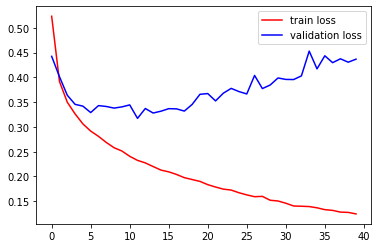

In [61]:
plt.plot(history.history['loss'], c = 'red', label = 'train loss')
plt.plot(history.history['val_loss'], c= 'blue', label = 'validation loss')
plt.legend()
plt.show()

In [32]:
model.evaluate(test_scaled.reshape(-1,28,28), test_target) # train_scaled

313/313 [==============================] - 1s 2ms/step - loss: 0.4863 - accuracy: 0.8722


[0.48627573251724243, 0.8722000122070312]

In [33]:
test_scaled.shape

(10000, 784)

In [67]:
model = model_fn(keras.layers.Dropout(0.3), name = 'Dropout_layers')

model.summary() ## 과대접합을 피하기위한 dropout 사용 train할때만 적용됨

Model: "Dropout_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_27 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam', #'adam'
              metrics = 'accuracy')

#history = model.fit(train_scaled.reshape(-1,28,28), train_target, epochs = 40) # train_scaled
history = model.fit(train_scaled, train_target, epochs = 40,
                    validation_data = (val_scaled, val_target))

Epoch 1/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5930 - accuracy: 0.7912 - val_loss: 0.4232 - val_accuracy: 0.8484
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4333 - accuracy: 0.8437 - val_loss: 0.3941 - val_accuracy: 0.8582
Epoch 3/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4008 - accuracy: 0.8540 - val_loss: 0.3686 - val_accuracy: 0.8689
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3780 - accuracy: 0.8602 - val_loss: 0.3549 - val_accuracy: 0.8742
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3627 - accuracy: 0.8670 - val_loss: 0.3531 - val_accuracy: 0.8713
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3493 - accuracy: 0.8726 - val_loss: 0.3403 - val_accuracy: 0.8783
Epoch 7/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3382 - accuracy: 0.8741 - val_loss: 0.3391 - val_accuracy:

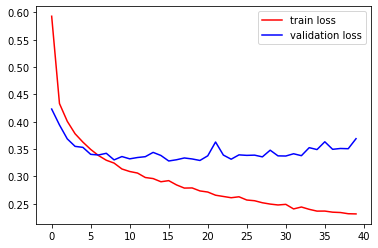

In [69]:
plt.plot(history.history['loss'], c = 'red', label = 'train loss')
plt.plot(history.history['val_loss'], c= 'blue', label = 'validation loss')
plt.legend()
plt.show()